In [ ]:
from datasets import load_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = load_dataset("GroNLP/ik-nlp-22_transqe")["train"].to_pandas()
#df

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/549367 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/9842 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/9824 [00:00<?, ? examples/s]

In [ ]:
df["da_hypothesis"] = df["da_hypothesis"].astype("float")
df["da_premise"] = df["da_premise"].astype("float")
df["mqm_hypothesis"] = df["mqm_hypothesis"].astype("float")
df["mqm_premise"] = df["mqm_premise"].astype("float")

<Axes: xlabel='da_hypothesis', ylabel='da_premise'>

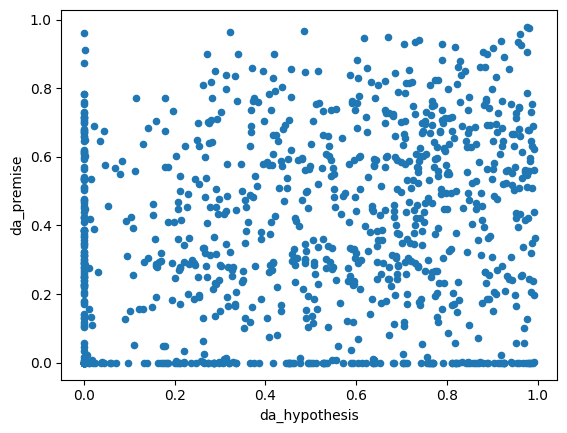

In [ ]:
df.sample(1000).plot(kind="scatter", x = "da_hypothesis", y = "da_premise")

<Axes: xlabel='mqm_hypothesis', ylabel='mqm_premise'>

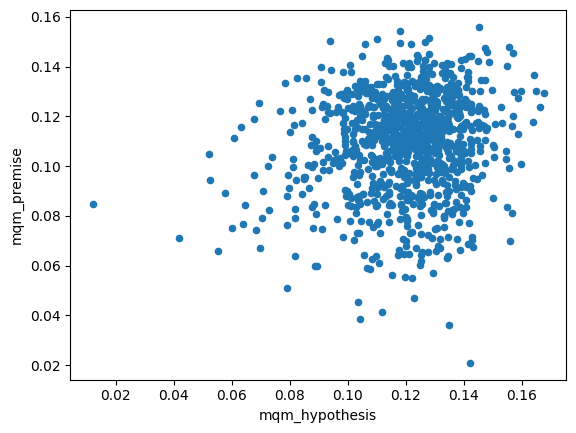

In [ ]:
df.sample(1000).plot(kind="scatter", x = "mqm_hypothesis", y = "mqm_premise")

<Axes: xlabel='da_hypothesis', ylabel='mqm_hypothesis'>

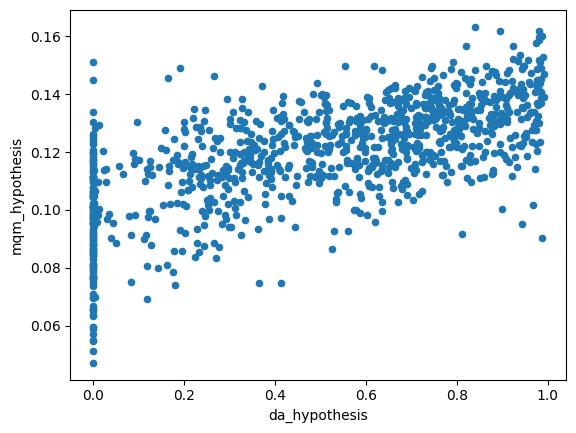

In [ ]:
df.sample(1000).plot(kind="scatter", x = "da_hypothesis", y = "mqm_hypothesis")

<Axes: xlabel='da_premise', ylabel='mqm_premise'>

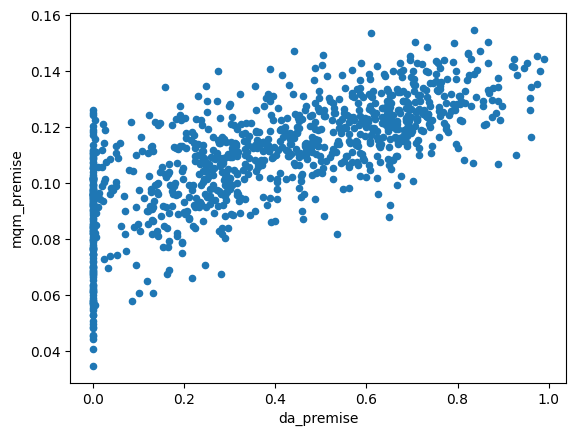

In [ ]:
df.sample(1000).plot(kind="scatter", x = "da_premise", y = "mqm_premise")

In [ ]:
def value_from_percentage(percentage: float, cols: list[str], df: pd.DataFrame):
    """Given a percentage, approximates for what da or mqm thershold, you keep
    that percentage of data, given all da/mqm filter values are the same.
    """

    min = 0.0
    max = 1.0
    total_len = len(df)

    for _ in range(100):
        new_try = (min + max) / 2.0
        new_len = (df[cols] > new_try).all(axis=1).sum()
        new_perc = new_len / total_len
        if new_perc > percentage:
            min = new_try
        else:
            max = new_try

    print(f"I found value {new_try}, which keeps {new_perc:.5f} of the original length ({new_len}/{total_len})")

value_from_percentage(0.1, ["mqm_hypothesis", "mqm_premise"], df)

I found value 0.127, which keeps 0.09942 of the original length (54616/549367)


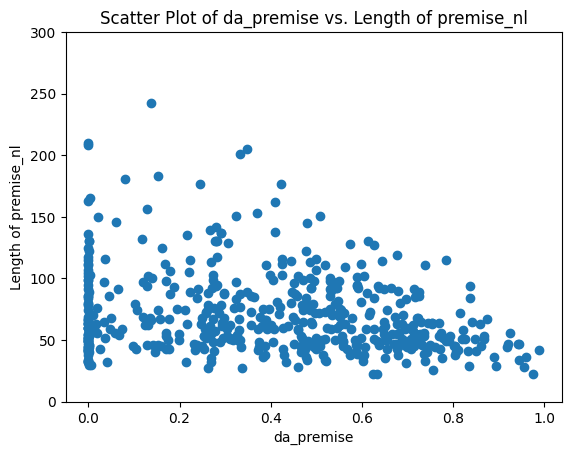

In [ ]:
tmp_df = df.sample(500)
da_p = tmp_df["da_premise"].to_list()
len_p = [len(s) for s in tmp_df["premise_nl"].to_list()]
plt.scatter(da_p, len_p)
plt.ylim(0, 300)
plt.xlabel('da_premise')
plt.ylabel('Length of premise_nl')
plt.title('Scatter Plot of da_premise vs. Length of premise_nl')
plt.show()

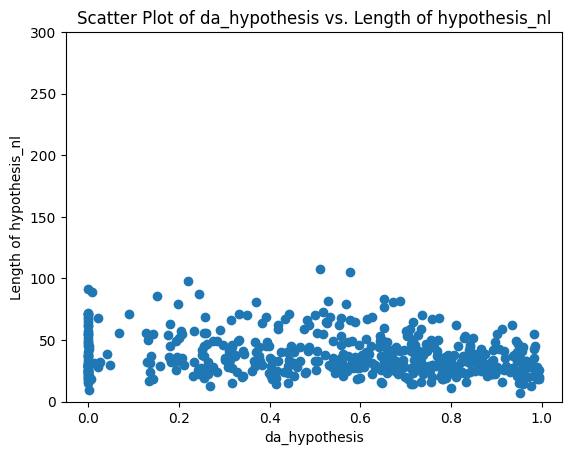

In [ ]:
#tmp_df = df.sample(500)
da_h = tmp_df["da_hypothesis"].to_list()
len_h = [len(s) for s in tmp_df["hypothesis_nl"].to_list()]
plt.scatter(da_h, len_h)
plt.ylim(0, 300)
plt.xlabel('da_hypothesis')
plt.ylabel('Length of hypothesis_nl')
plt.title('Scatter Plot of da_hypothesis vs. Length of hypothesis_nl')
plt.show()

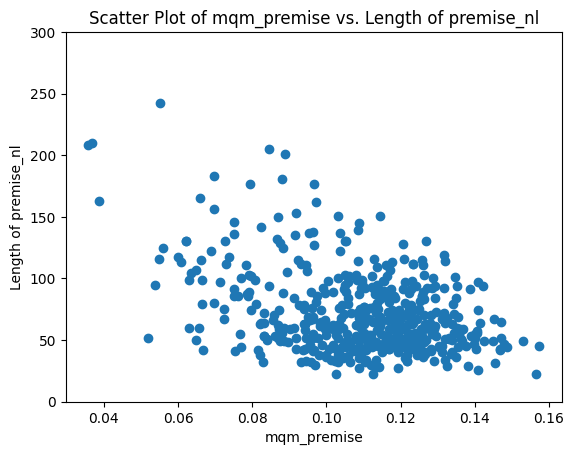

In [ ]:
#tmp_df = df.sample(500)
mqm_p = tmp_df["mqm_premise"].to_list()
len_p = [len(s) for s in tmp_df["premise_nl"].to_list()]
plt.scatter(mqm_p, len_p)
plt.ylim(0, 300)
plt.xlabel('mqm_premise')
plt.ylabel('Length of premise_nl')
plt.title('Scatter Plot of mqm_premise vs. Length of premise_nl')
plt.show()

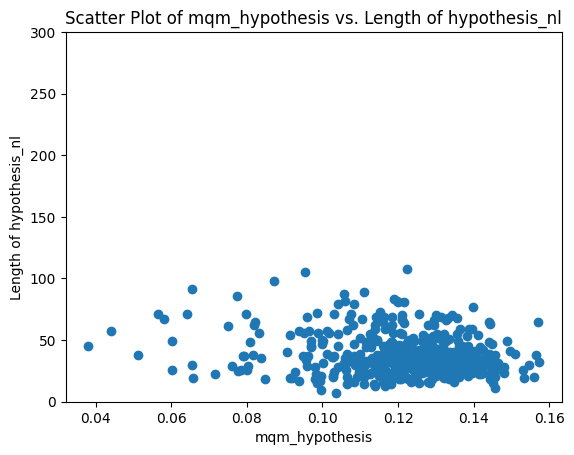

In [ ]:
#tmp_df = df.sample(500)
mqm_h = tmp_df["mqm_hypothesis"].to_list()
len_h = [len(s) for s in tmp_df["hypothesis_nl"].to_list()]
plt.scatter(mqm_h, len_h)
plt.ylim(0, 300)
plt.xlabel('mqm_hypothesis')
plt.ylabel('Length of hypothesis_nl')
plt.title('Scatter Plot of mqm_hypothesis vs. Length of hypothesis_nl')
plt.show()

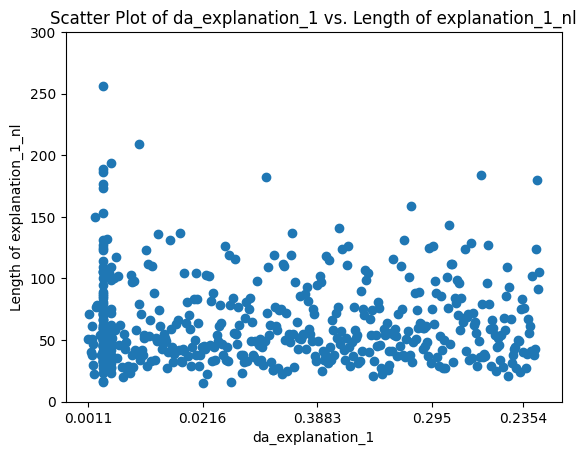

In [ ]:
#tmp_df = df.sample(500)
da_e = tmp_df["da_explanation_1"].to_list()
len_e = [len(s) for s in tmp_df["explanation_1_nl"].to_list()]
plt.scatter(da_e, len_e)
plt.ylim(0, 300)
plt.xticks([0, 100, 200, 300, 380])
plt.xlabel('da_explanation_1')
plt.ylabel('Length of explanation_1_nl')
plt.title('Scatter Plot of da_explanation_1 vs. Length of explanation_1_nl')
plt.show()

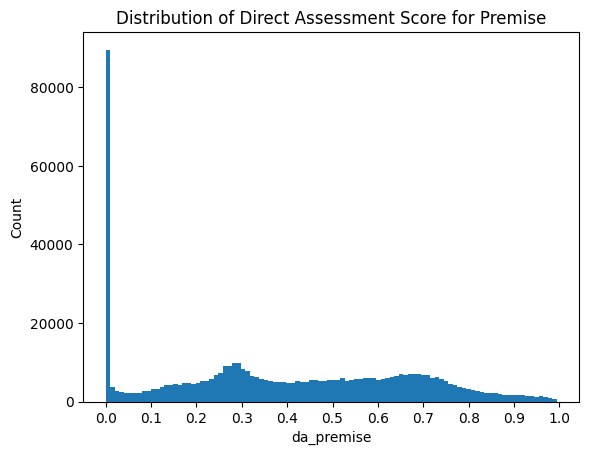

In [ ]:
plt.hist(df['da_premise'], bins = 100)
plt.title('Distribution of Direct Assessment Score for Premise')
plt.xlabel('da_premise')
plt.ylabel('Count')
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()



In [ ]:
first_bin_count = df[df['da_premise'].between(0, 0.05)].shape[0]
print("Count of da_premise between 0 and 0.05:", first_bin_count )

count_of_zeros = (df['da_premise'] == 0).sum()
print("Count of da_premise with exact value of 0:", count_of_zeros)


Count of da_premie between 0 and 0.05: 100918
Count of da_premise with exact value of 0: 51484


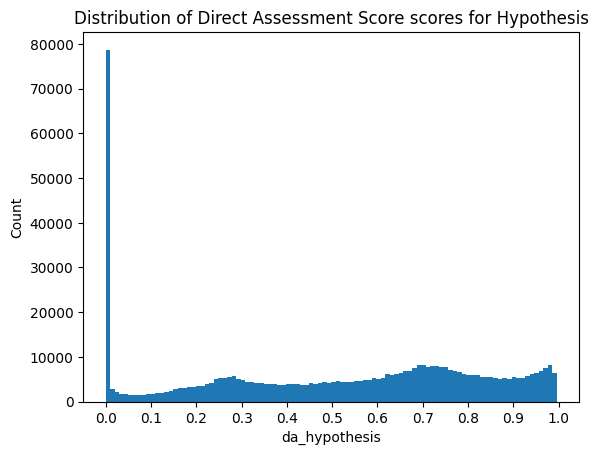

In [ ]:
plt.hist(df['da_hypothesis'], bins = 100)
plt.title('Distribution of Direct Assessment Score scores for Hypothesis')
plt.xlabel('da_hypothesis')
plt.ylabel('Count')
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

In [ ]:
first_bin_count = df[df['da_hypothesis'].between(0, 0.05)].shape[0]
print("Count of da_hypothesis between 0 and 0.05:", first_bin_count )

count_of_zeros = (df['da_hypothesis'] == 0).sum()
print("Count of da_hypothesis with exact value of 0:", count_of_zeros)

Count of da_hypothesis between 0 and 0.05: 87043
Count of da_hypothesis with exact value of 0: 40984


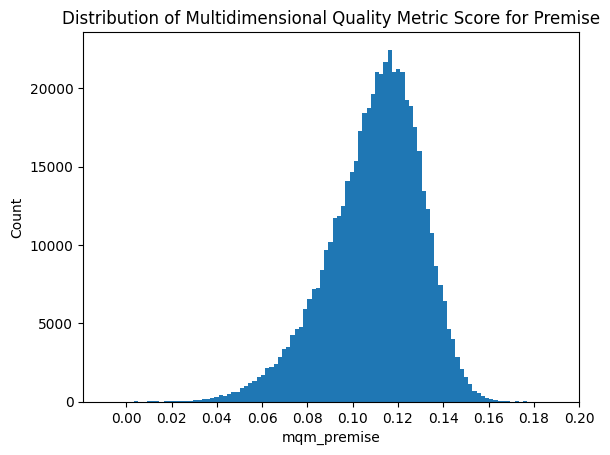

In [ ]:
plt.hist(df['mqm_premise'], bins = 100)
plt.title('Distribution of Multidimensional Quality Metric Score for Premise')
plt.xlabel('mqm_premise')
plt.ylabel('Count')
plt.xticks([0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2])
plt.show()

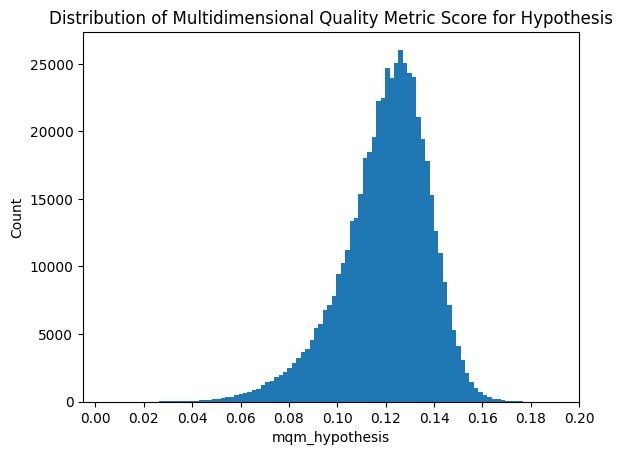

In [ ]:
plt.hist(df['mqm_hypothesis'], bins = 100)
plt.title('Distribution of Multidimensional Quality Metric Score for Hypothesis')
plt.xlabel('mqm_hypothesis')
plt.ylabel('Count')
plt.xticks([0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2])
plt.show()

In [ ]:
# Now doing the same as before, but such that it can do da and mqm at the same time
# Will normalize both score for this and then convert back
def norm_value_from_percentage(percentage: float, df: pd.DataFrame):
    da_cols = ["da_premise", "da_hypothesis"]
    mqm_cols = ["mqm_premise", "mqm_hypothesis"]

    all_da = df[da_cols[0]].to_list() + df[da_cols[1]].to_list()
    all_mqm = df[mqm_cols[0]].to_list() + df[mqm_cols[1]].to_list()
    da_mean, mqm_mean = np.mean(all_da), np.mean(all_mqm)
    da_std, mqm_std = np.std(all_da), np.std(all_mqm)

    min = -3.0
    max = 3.0
    total_len = len(df)

    for _ in range(100):
        new_try = (min + max) / 2.0
        da = da_mean + new_try * da_std
        mqm = mqm_mean + new_try * mqm_std

        da_th = (df[da_cols] > da).all(axis=1)
        mqm_th = (df[mqm_cols] > mqm).all(axis=1)
        new_len = (da_th & mqm_th).sum()
        new_perc = new_len / total_len

        if new_perc > percentage:
            min = new_try
        else:
            max = new_try

    print(f"I found normalized value {new_try}, which keeps {new_perc:.5f} of the original length ({new_len}/{total_len})")
    print(f"DA = {da} ; MQM = {mqm}")


norm_value_from_percentage(0.1, df)

I found normalized value 0.3598335398428264, which keeps 0.09957 of the original length (54700/549367)
DA = 0.5550792862302256 ; MQM = 0.1219


In [ ]:
da_cols = ["da_premise", "da_hypothesis"]
mqm_cols = ["mqm_premise", "mqm_hypothesis"]

da_th = df[da_cols] > 0.44642979802208715
mqm_th = df[mqm_cols] > 0.11473727180555075

(da_th.all(axis=1) & mqm_th.all(axis=1)).sum()

107566

In [ ]:
# def value_from_percentage(percentage: float, cols: list[str], df: pd.DataFrame):
#     """Given a percentage, approximates for what da or mqm thershold, you keep
#     that percentage of data, given all da/mqm filter values are the same.
#     """

#     min = 0.0
#     max = 1.0
#     total_len = len(df)

#     for _ in range(100):
#         new_try = (min + max) / 2.0
#         new_len = (df[cols] > new_try).all(axis=1).sum()
#         new_perc = new_len / total_len
#         if new_perc > percentage:
#             min = new_try
#         else:
#             max = new_try

#     print(f"I found value {new_try}, which keeps {new_perc:.5f} of the original length ({new_len}/{total_len})")

# value_from_percentage(0.1, ["mqm_hypothesis", "mqm_premise"], df)